## Convolutional Neural Networks (CNN's)
Powerful deep networks that are widely used in image related tasks like - Image Recognition, Segmenation, Computer Vision etc Input to these networks are images!

<img src="./images/cnn2.jpeg"
     alt="pokemon_back.jpg"
     style="width: 400px;" />


### Why another type of Networks?
Problem with Multilayer Perceptrons(MLP's)
<img src="./images/cnn.jpeg"
     alt="pokemon_back.jpg"
     style="width: 400px;" />

- **Overfitting** due too many parameters(~millions), while working with medium-large sized images!
- Fail to handle variance in images - translation, rotation, illumination, size etc!


<img src="./images/invariance.png"
     alt="pokemon_back.jpg"
     style="width: 400px;" />
        

### Why CNN's are special?

Let's have a look out this image!
<img src="./images/cat.jpg"
     alt="cat.jpg"
     style="width: 400px;" />

CNN know's this is a cat.
<img src="./images/cat1.jpg"
     alt="cat.jpg"
     style="width: 400px;" />

Even this is a cat.
<img src="./images/cat2.jpg"
     alt="cat.jpg"
     style="width: 400px;" />
This a cat too.
<img src="./images/cat3.jpg"
     alt="cat.jpg"
     style="width: 400px;" />
and this too!
<img src="./images/cat4.jpg"
     alt="cat.jpg"
     style="width: 400px;" />


## How does it happen? It's like Template Matching!
<img src="./images/conv.jpg"
     alt="cat.jpg"
     style="width: 800px;" />

### Let's understand Convolution
<img src="./images/Convolution_schematic.gif"
     alt="cat.jpg"
     style="width: 400px;" />

## Convolution layer?
- Convolution Layers are made up of filters
- but what are these filters?


### Code Example
Let's go through one code example 
to understand "Filters" and "Convolution"

When the feature is present in part of an image, the convolution operation between the filter and that part of the image results in a real number with a high value. If the feature is not present, the resulting value is low.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [32]:
def drawImg(img,title="Image"):
    plt.imshow(img,cmap="gray")
    plt.axis("off")
    plt.style.use("seaborn")
    plt.title(title+str(img.shape))
    plt.show()
    

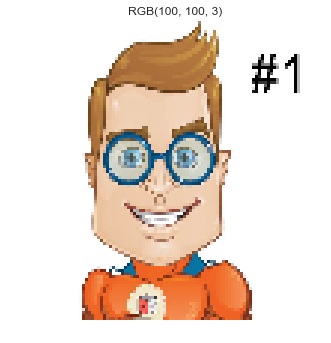

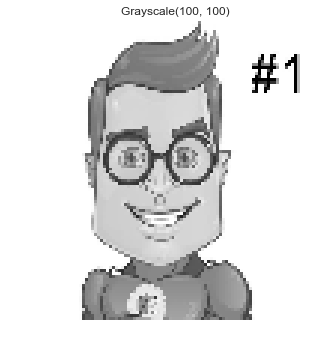

In [34]:
img_ = cv2.imread("./images/cody2.jpg") #BGR
img_ = cv2.resize(img_,(100,100))
img = cv2.cvtColor(img_,cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
drawImg(img,"RGB")
drawImg(img_gray,"Grayscale")



In [44]:
#Hardcoded filters

def convolution(img,img_filter):
    W = img.shape[0]
    H = img.shape[1]
    
    F = img_filter.shape[0] #3
    new_img = np.zeros((W-F+1,H-F+1))
    
    for row in range(W-F+1):
        for col in range(H-F+1):
            for i in range(F):
                for j in range(F):
                    new_img[row][col] += img[row+i][col+j]*img_filter[i][j]
                
                if new_img[row][col] > 255:
                    new_img[row][col] = 255
                
                elif new_img[row][col] < 0:
                    new_img[row][col] = 0
                
    return new_img #Activation Map

In [45]:
blur_filter = np.ones((3,3))/9.0

output1 = convolution(img_gray,blur_filter)

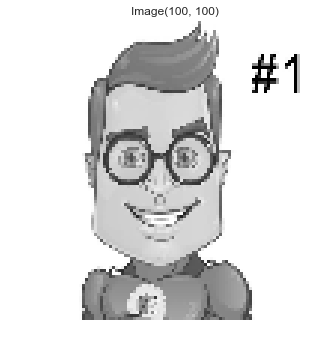

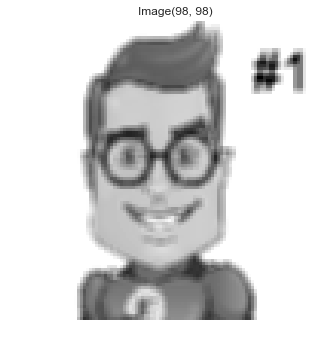

In [47]:
drawImg(img_gray)
drawImg(output1)

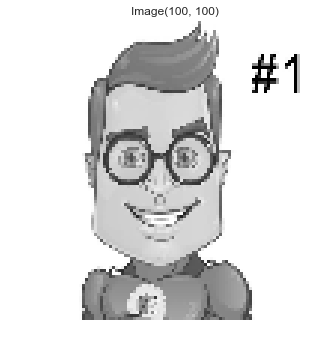

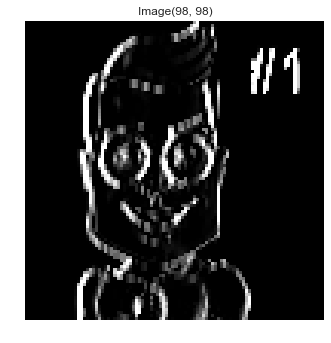

In [49]:
edge_filter = np.array([[1,0,-1],
                       [1,0,-1],
                       [1,0,-1]])

output2 = convolution(img_gray,edge_filter)
drawImg(img_gray)
drawImg(output2)

#### Extracting Features of image using Filters

### Convolution Layer
- contains various filters
- each filter extracts different kinds of features and gives 1 activation map
- multiple activation maps are combined by stacking to form output volume
- so CNN layer takes input a volume and produces an output volume of different shape

In [52]:
%%HTML
<div align="middle">
<video width="100%" controls>
      <source src="./images/conv_kiank.mp4" type="video/mp4">
</video></div>

### Buzzwords in CNN's
- Convolution Layer
- Valid vs Same Convolution
- Padding
- Stride
- Filters/Kernels
- Pooling (Average/Maxpooling)

### Stride
- Filters can have different size as well as movement
- Stride defines how a filter should move across the image
- No of pixels we skip each time is called stride
- In our example we used a stride of (1,1) along W and H
- You can also use a stride of (2,2) in that case the output volume will have less W and H

**Input and Output Sizes**:
(assuming 0 padding)
$$ n_H = \lfloor \frac{n_{H_{prev}} - f}{stride} \rfloor +1 $$
$$ n_W = \lfloor \frac{n_{W_{prev}} - f}{stride} \rfloor +1 $$
$$ n_C = n_{C_{prev}}$$

<img src="./images/Convolution_schematic.gif"
     alt="cat.jpg"
     style="width: 400px;" />


### Padding
- Convolution operation we have seen reduces "H" and "W" of original image
- But sometimes we want the output image to have same size as input image
- So we can achieve this by adding 0 value pixels(neurons) outside the original image
- This is called Padding

**Input and Output Sizes after Convolution**:
(with padding)



$$ n_H = \lfloor \frac{n_{H_{prev}} - f + 2 \times pad}{stride} \rfloor +1 $$
$$ n_W = \lfloor \frac{n_{W_{prev}} - f + 2 \times pad}{stride} \rfloor +1 $$
$$ n_C = \text{number of filters used in the convolution}$$

### Padding Example
Padding using [Numpy](https://docs.scipy.org/doc/numpy/reference/generated/numpy.pad.html)

<img src="./images/cody_pad.jpg"
     alt="cat.jpg"
     style="width: 400px;" />

(100, 100, 3)


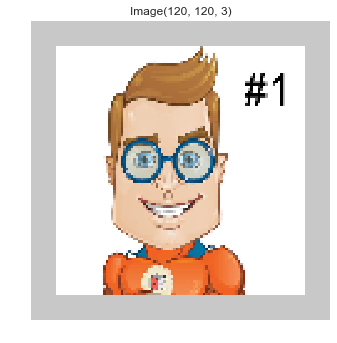

In [61]:
print(img.shape)
#drawImg(img)

#Padding to this image
pad_img = np.pad(img,((10,10),(10,10),(0,0)),'constant',constant_values=200)
drawImg(pad_img)

## Pooling Layers
- Pooling is performed after Convolution Operation
- Two types of pooling layer - Average Pooling and Max Pooling

- **Max-pooling layer**: slides an ($f, f$) window over the input and stores the max value of the window in the output.

- **Average-pooling layer**: slides an ($f, f$) window over the input and stores the average value of the window in the output.

- It helps to reduce computation by discarding 75% of the neurons(assuming 2X2 filters with stride of 2)
- Makes feature detectors more robust
- No parameters for learning, only hyperparameters such as filter size and type of pooling.
<img src="./images/mp.png"
     alt="cat.jpg"
     style="width: 400px;" />


### Implement Pooling Operation


In [64]:
X = np.array([[1,0,2,3],
              [4,6,6,8],
              [3,1,1,0],
              [1,2,2,4]])

def pooling(X,mode="max"):
    stride = 2
    f = 2
    H,W = X.shape
    
    HO = int((H-f)/stride) + 1
    WO = int((W-f)/stride) + 1
    
    output = np.zeros((HO,WO))
    
    for r in range(HO):
        for c in range(WO):
            r_start = r*stride
            r_end = r_start + f
            c_start = c*stride
            c_end = c_start + f
            
            X_slice = X[r_start:r_end,c_start:c_end]
            if mode=="max":
                output[r][c] = np.max(X_slice)
            else:
                output[r][c] = np.mean(X_slice)
                
    return output


In [65]:
pooling_output = pooling(X)
print(pooling_output)

[[6. 8.]
 [3. 4.]]


## General CNN Architecture

<img src="./images/arch.png"
     alt="cat.jpg"
     style="width: 600px;" />

[Conv Layers--> ReLu--->Pooling] --> FC -->Softmax
